In [1]:
import json
import networkx as nx
import pymorphy2
from nltk.corpus import stopwords

In [2]:
with open("../data/corpus_as_dict_of_norms.json") as f:
    corpus = json.load(f)

In [3]:
a = []
for i in range(len(corpus)):
    a.extend(list(corpus.values())[i])

In [62]:
for i in range(len(corpus)):
    if 'пластинка' in list(corpus.values())[i]:
        print(list(corpus.keys())[i])

Боб Дилан
Устрицы


In [63]:
print(corpus['Боб Дилан'])

['боб', 'дилан', 'американский', 'художник', 'писатель', 'и', 'киноактёр', 'один', 'из', 'самый', 'влиятельный', 'фигура', 'в', 'на', 'протяжение', 'последний', 'пятьдесят', 'год', 'больший', 'часть', 'самый', 'известный', 'работа', 'музыкант', 'быть', 'написать', 'в', 'год', 'когда', 'он', 'провозгласить', 'голос', 'поколение', 'и', 'один', 'из', 'главный', 'персона', 'протест', 'что', 'способствовать', 'такой', 'песня', 'как', 'blowin', 'in', 'the', 'wind', 'и', 'the', 'times', 'they', 'are', 'который', 'стать', 'гимн', 'движение', 'за', 'гражданский', 'право', 'и', 'движение', 'против', 'война', 'в', 'вьетнам', 'в', 'год', 'он', 'кардинально', 'сменить', 'звучание', 'тем', 'самый', 'отколоться', 'от', 'американский', 'и', 'свой', 'ранний', 'фанатский', 'база', 'записать', 'культовый', 'шестиминутный', 'сингл', 'like', 'a', 'rolling', 'stone', 'новаторский', 'концепция', 'который', 'считаться', 'один', 'из', 'переломный', 'момент', 'в', 'xx', 'век', 'текст', 'дилан', 'содержать', 'ши

In [4]:
len(a)

34642

In [5]:
morph = pymorphy2.MorphAnalyzer()

In [6]:
words = [word for word in a if morph.parse(word)[0].tag.POS == 'NOUN']

In [7]:
len(words)

14901

In [8]:
stops = stopwords.words("english") + stopwords.words("russian") + ["это", "который", "наш", "мочь", "год", 
                                            "такой", "знать", "мы", "свой", "один", "другой", "хотеть",
                                            "человек", "всё", "все", "весь", "очень", "думать", "нужно",
                                            "большой", "время", "использовать", "говорить", "сказать",
                                            "иметь", "сделать", "первый", "каждый", "день", "её", "ваш",
                                            "стать", "больший", "ваше", "день", "самый", "понять",
                                            "просто", "ещё", "проблема", "также", "например", "м", "c"]

In [64]:
words = [word for word in words if word not in stops]  # Удаляем стоп слова

In [65]:
from collections import Counter

In [66]:
cnt = dict(Counter(words))

In [67]:
cnt = {k: v for k, v in sorted(cnt.items(), key=lambda item: item[1], reverse=True)}

Запишем в массивы 100 самых популярных слов и сколько раз они встречаются

In [82]:
top_words = list(cnt.keys())[:50]

In [83]:
nodes_sizes = list(cnt.values())[:50]

In [84]:
import matplotlib.pyplot as plt

In [85]:
nodes_sizes = list(map(lambda x: x*10, nodes_sizes))

In [86]:
edges = []
for word in top_words:
    for second_word in top_words:
        count = 0
        if word != second_word:
            for doc in list(corpus.values()):
                if word in doc and second_word in doc:
                    count += 1
            edges.append((word, second_word, count))
edges = [edge for edge in edges if edge[2] >= 2]

In [87]:
len(edges)

1438

Все узлы графа

In [88]:
len(edges)

1438

Создаём граф

In [89]:
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [90]:
pos = nx.spring_layout(G)

In [91]:
labels = {}
for i in edges:
    labels[(i[0],i[1])] = i[2]

In [92]:
widths = list(map(lambda x: x*0.01, list(labels.values())))

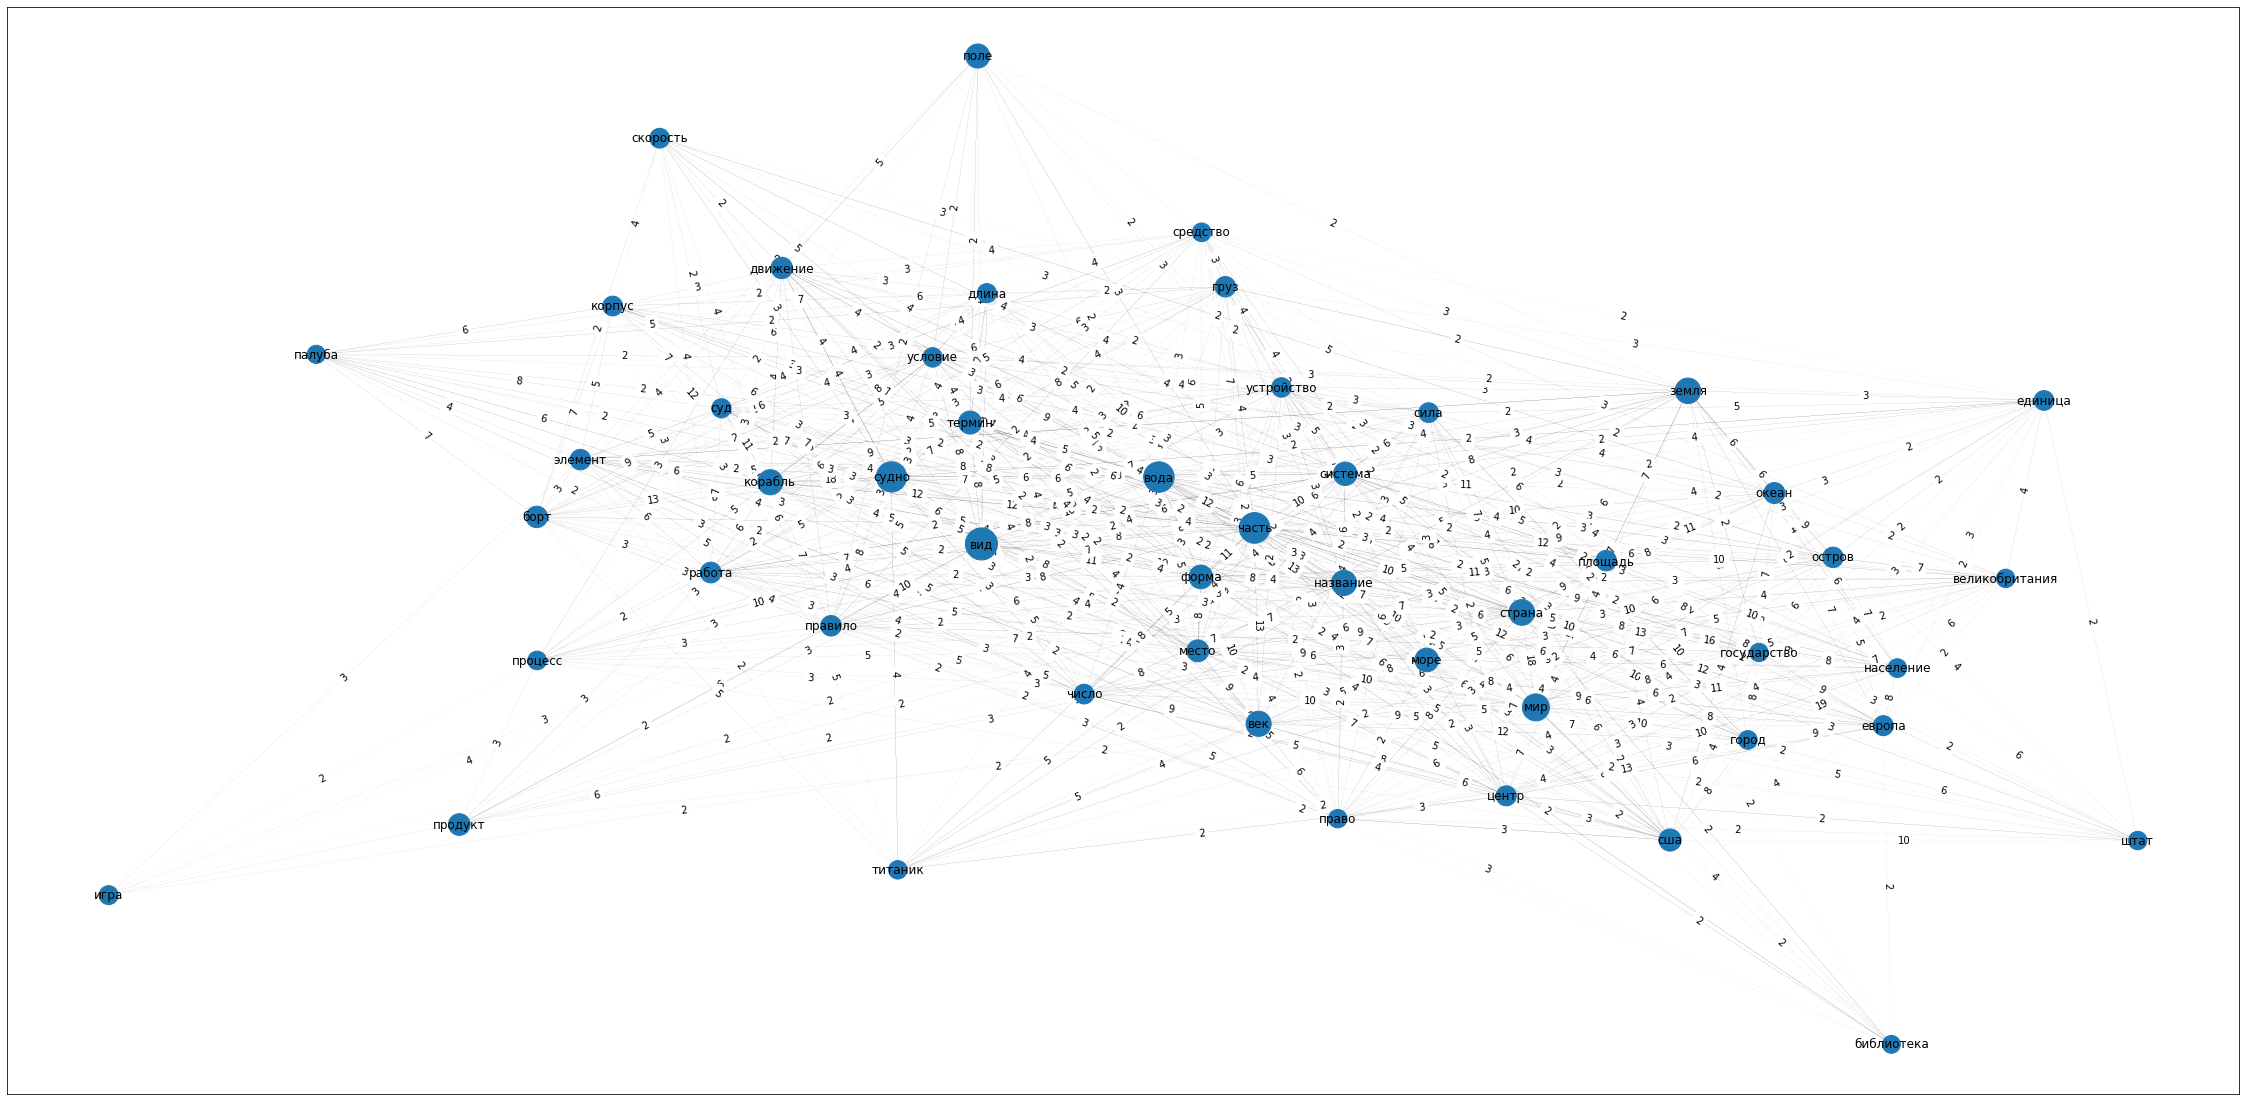

In [93]:
plt.figure(figsize=(40,20))
nx.draw_networkx(G, pos,  node_size=nodes_sizes, with_labels=True, width=widths)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

In [94]:
len(edges)

1438

Вот как выглядит граф с 100 узлами. Картина, мягко говоря, не очень

Попробуем граф для 10 ключевых слов

In [95]:
short_top_words = top_words[:10]
short_nodes_sizes = nodes_sizes[:10]

In [96]:
s_edges = []
for word in short_top_words:
    for second_word in short_top_words:
        count = 0
        if word != second_word:
            for doc in list(corpus.values()):
                if word and second_word in doc:
                    count += 1
            s_edges.append((word, second_word, count))
s_edges = [edge for edge in s_edges if edge[2] >= 2]

In [97]:
len(s_edges)

90

In [98]:
F = nx.Graph()
F.add_weighted_edges_from(s_edges)

In [99]:
pos = nx.spring_layout(F)

In [100]:
s_labels = {}
for i in s_edges:
    s_labels[(i[0],i[1])] = i[2]

In [101]:
short_nodes_sizes

[1030, 940, 930, 920, 730, 660, 650, 630, 630, 630]

In [102]:
short_nodes_sizes = list(map(lambda x: x*1.5, short_nodes_sizes))

In [103]:
s_widths = list(map(lambda x: x*0.05, list(s_labels.values())))

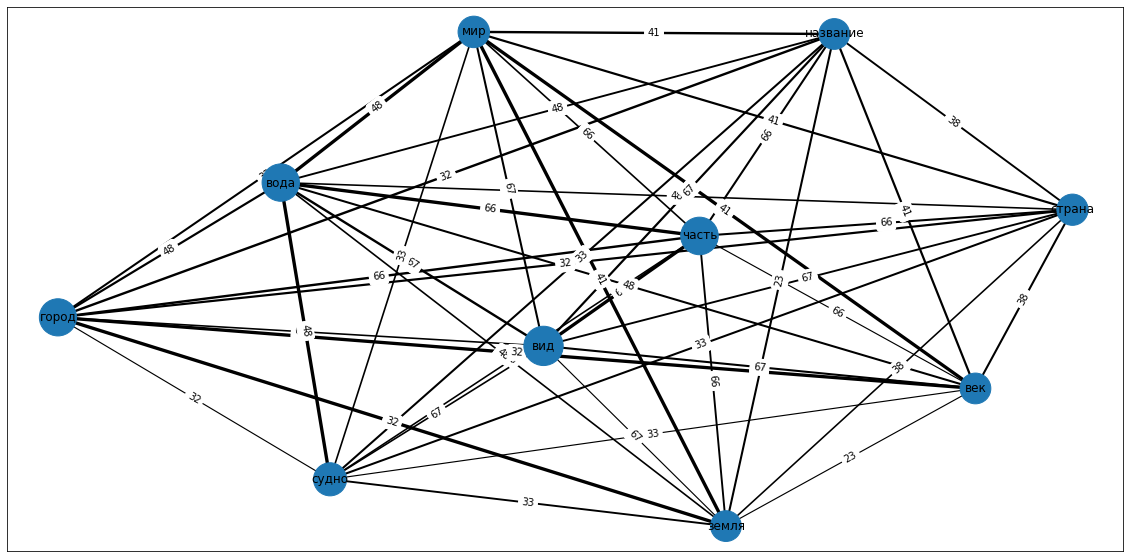

In [104]:
plt.figure(figsize=(20,10))
nx.draw_networkx(F, pos,  node_size=short_nodes_sizes, with_labels=True, width=s_widths)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=s_labels)
plt.show()

Тут уже более понятный граф :)